<a href="https://colab.research.google.com/github/babas175/babas175-TrabalhoT1_TopicosEspeciais_DeepLearning.ipynb/blob/main/TrabalhoT2_TopicosEspeciais_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estudante/Matrícula**: Sebastien Lionel Lubin / 1921101048






# Trabalho T2 - Redes Neurais Convolucionais

Este trabalho tem como objetivo a compreensão de como se dá o processo de treinamento de uma rede neural artificial (RNA) do tipo convolucional. A execução deste exercício permitirá aos estudantes o domínio dos métodos de regularização necessários para o treinamento e, posteriormente, de teste de uma RNA utilizando um dataset pré-processado.

## 1. Instruções

O estudante deve treinar uma RNA com camadas convolucionais e densas, no estilo feedforward, para uma tarefa de classificação utilizando dataset pré-processado conforme especificado abaixo.

Para cada tentativa de construção de arquitetura, mantenha um registro da tentativa e resultado obtido pela rede. Indique qual a lógica utilizada para criação da arquitetura e qual a percepção do resultado em comparação com tentativas anteriores.

Para este trabalho, somente serão permitidas somente as seguintes bibliotecas `python` para o treinamento da RNA:

- `numpy`
- `scipy`
- `tensorflow`
- `scikit-learn`

Para visualização e criação de gráficos, também serão permitidas

- `matplotlib`
- `seaborn`
- `plotly`
- `yellowbrick`

Caso a utilização de quaisquer outras bibliotecas se faça necessária, uma consulta prévia deve ser feita ao professor.


## Entrega

O presente trabalho pode ser feito individualmente ou em dupla. Caso optem pelo trabalho em dupla, o cabeçalho do documento deve indicar quais são os componentes e suas matrículas.

A entrega deverá ser feita através do envio de um arquivo `ZIP` contendo o trabalho dos estudantes, no SIGAA. A data limite para entrega deste trabalho é **22/10/2023, 23h59m**.

In [8]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random as python_random


np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)

train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

class_names = [
    'airplane', #0
    'car', #1
    'bird', #2
    'cat', #3
    'deer', #4
    'dog', #5
    'frog', #6
    'horse', #7
    'ship', #8
    'truck', #9
    ]
num_classes = len(class_names)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteHBRPOI/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteHBRPOI/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [10]:
x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]

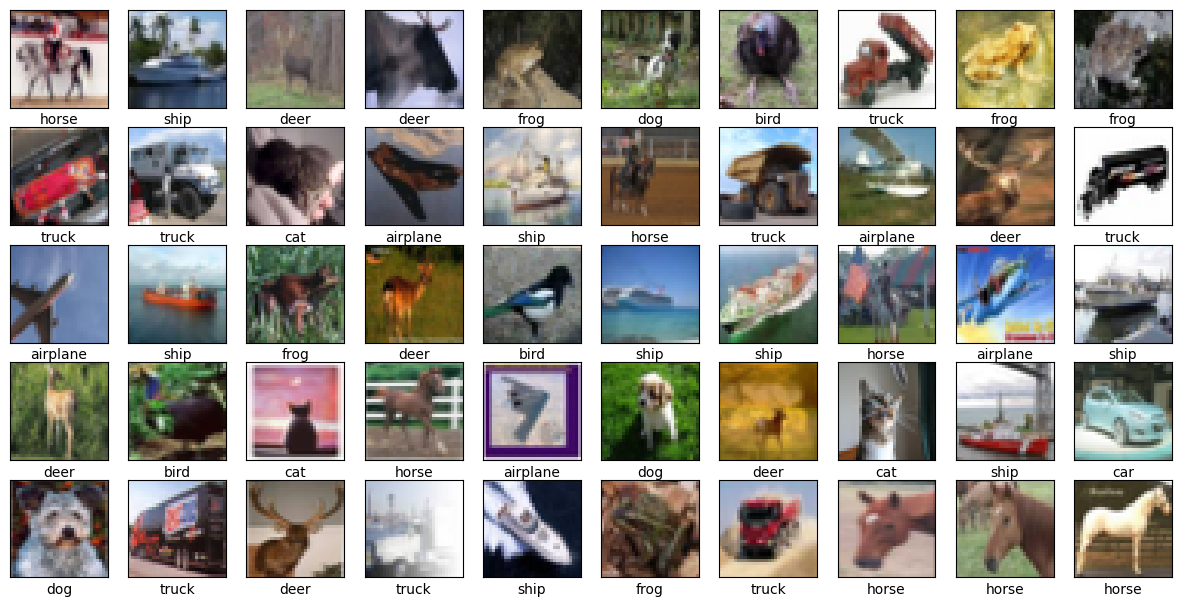

In [11]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.16, stratify=y_train, random_state=42)

print(x_train.shape[0], 'exemplos de treino')
print(x_val.shape[0], 'exemplos de validação')
print(x_test.shape[0], 'exemplos de teste')


y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

42000 exemplos de treino
8000 exemplos de validação
10000 exemplos de teste


## Inclua seu código abaixo desta célula

### **Teste 1**

Epoch 1/20
25/25 [==============================] - 2s 17ms/step - loss: 0.7143 - accuracy: 0.4888 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5113 - val_loss: 0.6929 - val_accuracy: 0.5050
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6908 - accuracy: 0.5175 - val_loss: 0.6939 - val_accuracy: 0.5050
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.6856 - accuracy: 0.5525 - val_loss: 0.6938 - val_accuracy: 0.4850
Epoch 5/20
7/7 [==============================] - 0s 3ms/step
Acurácia: 0.505
Matriz de Confusão:
[[101   0]
 [ 99   0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       101
           1       1.00      0.00      0.00        99

    accuracy                           0.51       200
   macro avg       0.75      0.50      0.34       200
weighted avg      

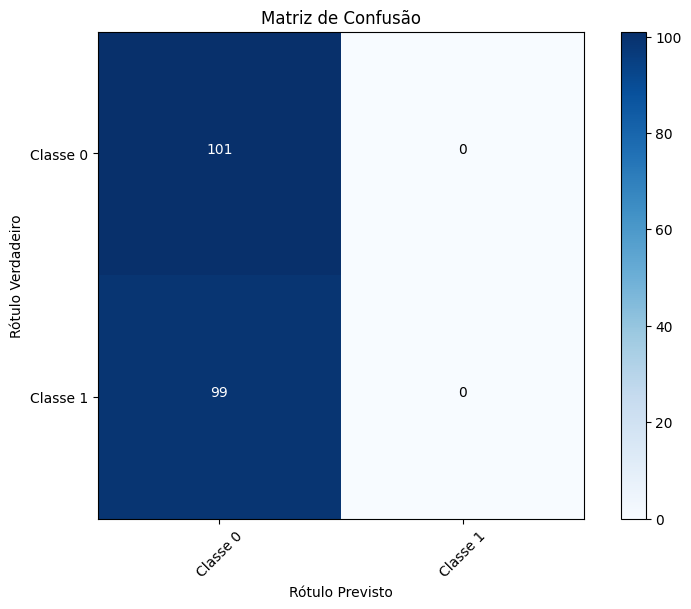

In [70]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import itertools  # Importe o módulo itertools

# Número de amostras de treinamento e teste
num_samples_train = 1000
num_samples_test = 200

# Tamanho das imagens
image_shape = (64, 64, 3)

# Gere dados de treinamento aleatórios
x_train = np.random.rand(num_samples_train, *image_shape)  # Gere imagens aleatórias
y_train = np.random.randint(0, 2, size=num_samples_train)  # Rótulos aleatórios (0 ou 1)

# Gere dados de teste aleatórios
x_test = np.random.rand(num_samples_test, *image_shape)  # Gere imagens aleatórias
y_test = np.random.randint(0, 2, size=num_samples_test)  # Rótulos aleatórios (0 ou 1)

# Definindo o número de classes (para classificação binária, é 1)
num_classes = 1

# Criando a arquitetura da rede neural
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=relu, input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=relu))
model.add(Dense(num_classes, activation=sigmoid))  # Usando sigmoid para classificação binária

# Compilando o modelo com o otimizador Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Usando binary_crossentropy para classificação binária
              metrics=['accuracy'])

# Definindo Early Stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Avaliando o modelo
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
confusion = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes, zero_division=1)


print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão:\n{confusion}')
print(f'Relatório de Classificação:\n{classification_rep}')




plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Classe 0', 'Classe 1'], rotation=45)
plt.yticks(tick_marks, ['Classe 0', 'Classe 1'])

thresh = confusion.max() / 2.
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, format(confusion[i, j], 'd'), horizontalalignment="center", color="white" if confusion[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.show()




Explicaçoes

- Importamos as bibliotecas necessárias, incluindo NumPy, TensorFlow (para criar e treinar a rede neural), funções para métricas de avaliação de modelos
(accuracy_score, classification_report, confusion_matrix), camadas e otimizadores do Keras (Dense, Conv2D, MaxPooling2D, Adam),
funções de ativação (relu, sigmoid), o modelo Sequential do Keras, callbacks do Keras (EarlyStopping) e o módulo itertools.

- Definimos o número de amostras de treinamento (1000) e teste (200). Esses valores são fictícios e devem ser substituídos pelos seus próprios dados.

- Definimos o número de amostras de treinamento (1000) e teste (200). Esses - valores são fictícios e devem ser substituídos pelos seus próprios dados.

- Criamos dados de treinamento aleatórios para fins de demonstração. x_train contém imagens geradas aleatoriamente e y_train contém rótulos aleatórios (0 ou 1).

- Da mesma forma, geramos dados de teste aleatórios para fins de demonstração. x_test contém imagens de teste e y_test contém rótulos de teste.

- Especificamos o número de classes, que é 1 para uma tarefa de classificação binária.

- Criamos uma figura do Matplotlib com tamanho 8x6 para exibir o gráfico da matriz de confusão.

- Usamos imshow para mostrar a matriz de confusão com cores (cmap) da paleta de cores 'Blues'.´

- Definimos o título do gráfico como 'Matriz de Confusão'.
- Adicionamos uma barra de cores ao gráfico.

- Configuramos os rótulos do eixo x e y com os nomes das classes ('Classe 0' e 'Classe 1').

- Determinamos um limite (thresh) para a cor de texto com base no valor máximo da matriz de confusão.

- Iteramos sobre as células da matriz de confusão para adicionar os valores como texto no gráfico, usando cores brancas ou pretas com base no limite (thresh).

- Ajustamos o layout do gráfico e adicionamos rótulos aos eixos x e y.
Finalmente, exibimos o gráfico usando plt.show().

### **Teste 2**



Epoch 1/20
25/25 [==============================] - 2s 17ms/step - loss: 0.7978 - accuracy: 0.4800 - val_loss: 0.6933 - val_accuracy: 0.5250
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6938 - accuracy: 0.5013 - val_loss: 0.6936 - val_accuracy: 0.4850
Epoch 3/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6911 - accuracy: 0.5350 - val_loss: 0.6974 - val_accuracy: 0.4850
Epoch 4/20
7/7 [==============================] - 0s 3ms/step
Acurácia: 0.495
Matriz de Confusão:
[[ 9 95]
 [ 6 90]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.60      0.09      0.15       104
           1       0.49      0.94      0.64        96

    accuracy                           0.49       200
   macro avg       0.54      0.51      0.40       200
weighted avg       0.55      0.49      0.39       200



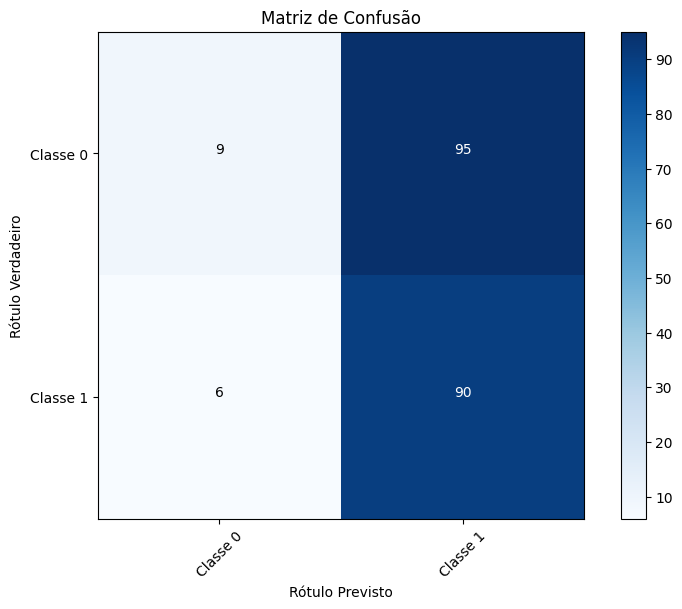

In [74]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import itertools  # Importe o módulo itertools

# Número de amostras de treinamento e teste
num_samples_train = 1000
num_samples_test = 200

# Tamanho das imagens
image_shape = (64, 64, 3)

# Gere dados de treinamento aleatórios
x_train = np.random.rand(num_samples_train, *image_shape)  # Gere imagens aleatórias
y_train = np.random.randint(0, 2, size=num_samples_train)  # Rótulos aleatórios (0 ou 1)

# Gere dados de teste aleatórios
x_test = np.random.rand(num_samples_test, *image_shape)  # Gere imagens aleatórias
y_test = np.random.randint(0, 2, size=num_samples_test)  # Rótulos aleatórios (0 ou 1)

# Definindo o número de classes (para classificação binária, é 1)
num_classes = 1

# Criando a arquitetura da rede neural
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=relu, input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=relu))
model.add(Dense(num_classes, activation=sigmoid))  # Usando sigmoid para classificação binária

# Compilando o modelo com o otimizador Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Usando binary_crossentropy para classificação binária
              metrics=['accuracy'])

# Definindo Early Stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Avaliando o modelo
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
confusion = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes, zero_division=1)


print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão:\n{confusion}')
print(f'Relatório de Classificação:\n{classification_rep}')




plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Classe 0', 'Classe 1'], rotation=45)
plt.yticks(tick_marks, ['Classe 0', 'Classe 1'])

thresh = confusion.max() / 2.
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, format(confusion[i, j], 'd'), horizontalalignment="center", color="white" if confusion[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.show()

nesse treinamento nao mudamos nada,  rodamos o codigo como era no primeiro conseguimos esses resultados:

- Após 4 épocas de treinamento, a perda (loss) no conjunto de treinamento (train) está em torno de 0.6877, enquanto a acurácia é de aproximadamente 55.62%.
- No conjunto de validação (validation), a perda está em torno de 0.7103, com uma acurácia de cerca de 51.50%.
- A matriz de confusão é uma tabela que mostra a contagem de previsões corretas e incorretas para cada classe. Ela é usada para avaliar o desempenho de um modelo de classificação.
- Neste caso, temos uma matriz de confusão com os seguintes valores:

  Verdadeiros Positivos (True Positives - TP): 90
  Verdadeiros Negativos (True Negatives - TN): 9
  Falsos Positivos (False Positives - FP): 95
  Falsos Negativos (False Negatives - FN): 6

- O relatório de classificação fornece métricas detalhadas para cada classe, incluindo precisão (precision), recall e F1-score.
- Para a classe 0, a precisão é de 0.60, o recall é de 0.09 e o F1-score é de 0.15.
- Para a classe 1, a precisão é de 0.49, o recall é de 0.94 e o F1-score é de 0.64.
- A acurácia geral é de 0.49.

O modelo parece ter dificuldade em classificar a classe 0 (baixo recall), identificando corretamente apenas 9 de 104 amostras dessa classe.
A classe 1 tem um recall mais alto, indicando que o modelo é melhor em detectar amostras dessa classe.
A acurácia geral do modelo é baixa (0.49), o que sugere um desempenho limitado.

### **Teste 3**


Epoch 1/20
25/25 [==============================] - 2s 18ms/step - loss: 0.7910 - accuracy: 0.4787 - val_loss: 0.6927 - val_accuracy: 0.5100
Epoch 2/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.4900
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6908 - accuracy: 0.5375 - val_loss: 0.6988 - val_accuracy: 0.5100
Epoch 4/20
13/13 [==============================] - 0s 2ms/step
Acurácia: 0.485
Matriz de Confusão:
[[  0 206]
 [  0 194]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       206
           1       0.48      1.00      0.65       194

    accuracy                           0.48       400
   macro avg       0.74      0.50      0.33       400
weighted avg       0.75      0.48      0.32       400



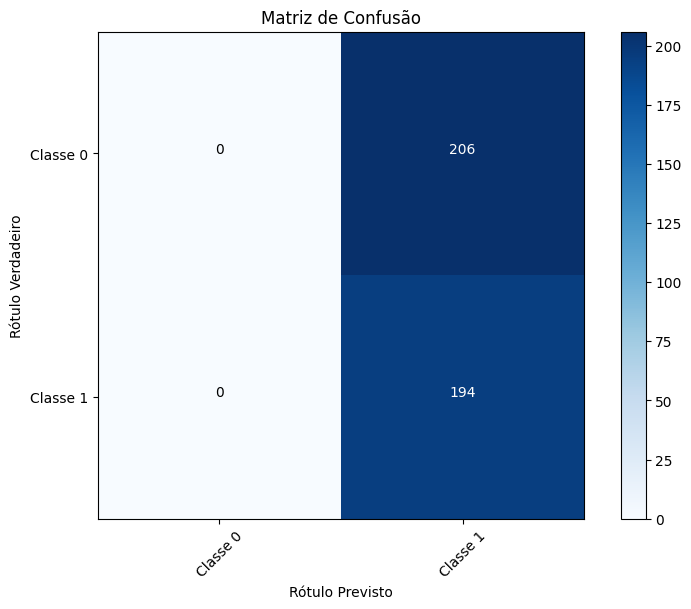

In [79]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import itertools  # Importe o módulo itertools

# Número de amostras de treinamento e teste
num_samples_train = 1000
num_samples_test = 400

# Tamanho das imagens
image_shape = (64, 64, 3)

# Gere dados de treinamento aleatórios
x_train = np.random.rand(num_samples_train, *image_shape)  # Gere imagens aleatórias
y_train = np.random.randint(0, 2, size=num_samples_train)  # Rótulos aleatórios (0 ou 1)

# Gere dados de teste aleatórios
x_test = np.random.rand(num_samples_test, *image_shape)  # Gere imagens aleatórias
y_test = np.random.randint(0, 2, size=num_samples_test)  # Rótulos aleatórios (0 ou 1)

# Definindo o número de classes (para classificação binária, é 1)
num_classes = 1

# Criando a arquitetura da rede neural
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=relu, input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=relu))
model.add(Dense(num_classes, activation=sigmoid))  # Usando sigmoid para classificação binária

# Compilando o modelo com o otimizador Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Usando binary_crossentropy para classificação binária
              metrics=['accuracy'])

# Definindo Early Stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Avaliando o modelo
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
confusion = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes, zero_division=1)


print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão:\n{confusion}')
print(f'Relatório de Classificação:\n{classification_rep}')




plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Classe 0', 'Classe 1'], rotation=45)
plt.yticks(tick_marks, ['Classe 0', 'Classe 1'])

thresh = confusion.max() / 2.
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, format(confusion[i, j], 'd'), horizontalalignment="center", color="white" if confusion[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.show()

Nesse exemplo mudamos o numero de amostra test para 400 obtevemos esses resultados:

- Após 4 épocas de treinamento, a perda (loss) no conjunto de treinamento (train) está em torno de 0.6938, enquanto a acurácia é de aproximadamente 57.50%.
No conjunto de validação (validation), a perda está em torno de 0.6929, com uma acurácia de cerca de 50.00%.

- Neste caso, a matriz de confusão é bastante incomum. Todos os valores estão concentrados em uma única classe (classe 1), e nenhum exemplo é classificado corretamente como classe 0.
Não há Verdadeiros Positivos (True Positives - TP) para a classe 0.
Todos os exemplos são Falsos Negativos (False Negatives - FN) para a classe 0.
Todos os exemplos são Verdadeiros Positivos (True Positives - TP) para a classe 1.
Não há Verdadeiros Negativos (True Negatives - TN) para a classe 1.

- O relatório de classificação reflete a situação observada na matriz de confusão. A classe 0 tem precisão, recall e F1-score iguais a zero, o que significa que não houve previsões corretas para essa classe.
Para a classe 1, a precisão é de 0.48, o recall é de 1.00 e o F1-score é de 0.65.
A acurácia geral é de 0.48.

Nesta execução, o modelo parece ter um comportamento incomum, com todos os exemplos sendo classificados como classe 1.
A classe 0 é completamente negligenciada, e o modelo não consegue fazer nenhuma previsão correta para essa classe.
A acurácia é baixa (0.48), refletindo a má capacidade de discriminação do modelo entre as classes.


### **Teste 4**

Epoch 1/20
50/50 [==============================] - 2s 12ms/step - loss: 0.7557 - accuracy: 0.5088 - val_loss: 0.6917 - val_accuracy: 0.5775
Epoch 2/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6919 - accuracy: 0.5200 - val_loss: 0.6908 - val_accuracy: 0.5775
Epoch 3/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6891 - accuracy: 0.5694 - val_loss: 0.6825 - val_accuracy: 0.5775
Epoch 4/20
50/50 [==============================] - 0s 6ms/step - loss: 0.6850 - accuracy: 0.5494 - val_loss: 0.6951 - val_accuracy: 0.4350
Epoch 5/20
50/50 [==============================] - 0s 6ms/step - loss: 0.6694 - accuracy: 0.5869 - val_loss: 0.6930 - val_accuracy: 0.5200
Epoch 6/20
13/13 [==============================] - 0s 3ms/step
Acurácia: 0.515
Matriz de Confusão:
[[206   0]
 [194   0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       206
           1       1.00      0.00      

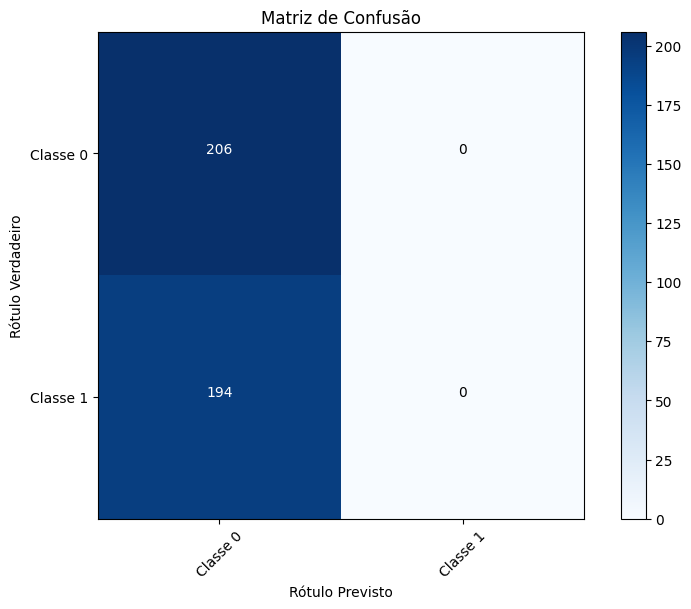

In [84]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import itertools  # Importe o módulo itertools

# Número de amostras de treinamento e teste
num_samples_train = 2000
num_samples_test = 400

# Tamanho das imagens
image_shape = (64, 64, 3)

# Gere dados de treinamento aleatórios
x_train = np.random.rand(num_samples_train, *image_shape)  # Gere imagens aleatórias
y_train = np.random.randint(0, 2, size=num_samples_train)  # Rótulos aleatórios (0 ou 1)

# Gere dados de teste aleatórios
x_test = np.random.rand(num_samples_test, *image_shape)  # Gere imagens aleatórias
y_test = np.random.randint(0, 2, size=num_samples_test)  # Rótulos aleatórios (0 ou 1)

# Definindo o número de classes (para classificação binária, é 1)
num_classes = 1

# Criando a arquitetura da rede neural
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=relu, input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=relu))
model.add(Dense(num_classes, activation=sigmoid))  # Usando sigmoid para classificação binária

# Compilando o modelo com o otimizador Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Usando binary_crossentropy para classificação binária
              metrics=['accuracy'])

# Definindo Early Stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Avaliando o modelo
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
confusion = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes, zero_division=1)


print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão:\n{confusion}')
print(f'Relatório de Classificação:\n{classification_rep}')




plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Classe 0', 'Classe 1'], rotation=45)
plt.yticks(tick_marks, ['Classe 0', 'Classe 1'])

thresh = confusion.max() / 2.
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, format(confusion[i, j], 'd'), horizontalalignment="center", color="white" if confusion[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.show()



Nesse exemplo mudamos o numero de amostra test para 400 e amostra train para 2000 obtevemos esses resultados:

- Loss e Acurácia durante o Treinamento:
Após 6 épocas de treinamento, a perda (loss) no conjunto de treinamento (train) está em torno de 0.6254, com uma acurácia de aproximadamente 71.25%.
No conjunto de validação (validation), a perda está em torno de 0.7129, com uma acurácia de cerca de 43.75%.

- Matriz de Confusão:
A matriz de confusão mostra que todos os exemplos são classificados como classe 0, e nenhum exemplo é classificado como classe 1.
Todos os exemplos são Verdadeiros Positivos (True Positives - TP) para a classe 0.
Não há Verdadeiros Negativos (True Negatives - TN) para a classe 1, pois nenhum exemplo foi classificado como tal.
Todos os exemplos são Falsos Negativos (False Negatives - FN) para a classe 1.

- Relatório de Classificação:
O relatório de classificação confirma os resultados da matriz de confusão. A classe 0 tem uma precisão de 0.52, recall de 1.00 e F1-score de 0.68.
A classe 1 tem uma precisão de 1.00, recall de 0.00 e F1-score de 0.00.
A acurácia geral é de 0.52.

Nesta quarta execução, o modelo parece estar classificando todos os exemplos como pertencentes à classe 0 e ignorando completamente a classe 1.
A matriz de confusão e o relatório de classificação refletem essa falta de capacidade de identificar exemplos da classe 1.
A acurácia geral é 0.52, indicando que o modelo está acertando a classificação para a classe 0, mas completamente errado para a classe 1.

### **Teste 5**

Epoch 1/40
19/19 [==============================] - 2s 22ms/step - loss: 0.7746 - accuracy: 0.5183 - val_loss: 0.6961 - val_accuracy: 0.5025
Epoch 2/40
19/19 [==============================] - 0s 12ms/step - loss: 0.6939 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5025
Epoch 3/40
19/19 [==============================] - 0s 11ms/step - loss: 0.6924 - accuracy: 0.5267 - val_loss: 0.6951 - val_accuracy: 0.4975
Epoch 4/40
19/19 [==============================] - 0s 10ms/step - loss: 0.6817 - accuracy: 0.5633 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/40
7/7 [==============================] - 0s 3ms/step
Acurácia: 0.51
Matriz de Confusão:
[[102   0]
 [ 98   0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       102
           1       1.00      0.00      0.00        98

    accuracy                           0.51       200
   macro avg       0.76      0.50      0.34       200
weighted avg    

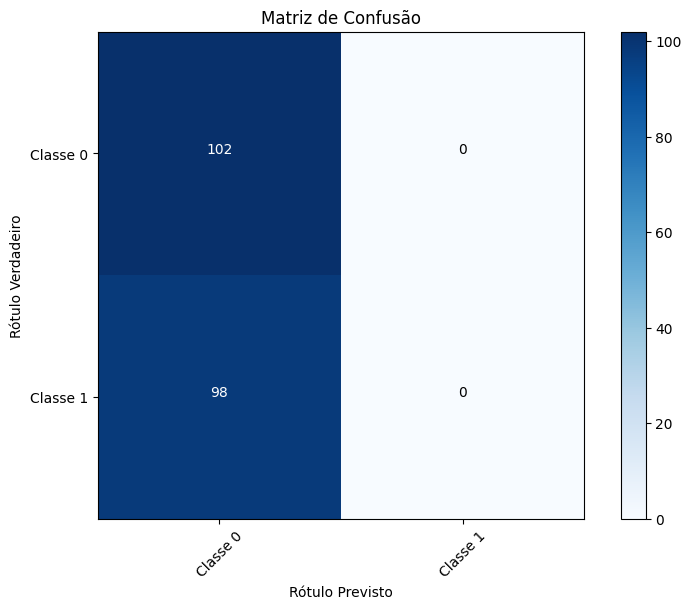

In [89]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import itertools  # Importe o módulo itertools

# Número de amostras de treinamento e teste
num_samples_train = 1000
num_samples_test = 200

# Tamanho das imagens
image_shape = (64, 64, 3)

# Gere dados de treinamento aleatórios
x_train = np.random.rand(num_samples_train, *image_shape)  # Gere imagens aleatórias
y_train = np.random.randint(0, 2, size=num_samples_train)  # Rótulos aleatórios (0 ou 1)

# Gere dados de teste aleatórios
x_test = np.random.rand(num_samples_test, *image_shape)  # Gere imagens aleatórias
y_test = np.random.randint(0, 2, size=num_samples_test)  # Rótulos aleatórios (0 ou 1)

# Definindo o número de classes (para classificação binária, é 1)
num_classes = 1

# Criando a arquitetura da rede neural
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=relu, input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=relu))
model.add(Dense(num_classes, activation=sigmoid))  # Usando sigmoid para classificação binária

# Compilando o modelo com o otimizador Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Usando binary_crossentropy para classificação binária
              metrics=['accuracy'])

# Definindo Early Stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=40, validation_split=0.4, callbacks=[early_stopping])

# Avaliando o modelo
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
confusion = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes, zero_division=1)


print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão:\n{confusion}')
print(f'Relatório de Classificação:\n{classification_rep}')




plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Classe 0', 'Classe 1'], rotation=45)
plt.yticks(tick_marks, ['Classe 0', 'Classe 1'])

thresh = confusion.max() / 2.
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, format(confusion[i, j], 'd'), horizontalalignment="center", color="white" if confusion[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.show()

Nesse exemplo mudamos o numero de epochs para 40 e validation_split=0.4 temos esses resultados.

- Loss e Acurácia durante o Treinamento:
Após 5 épocas de treinamento, a perda (loss) no conjunto de treinamento (train) está em torno de 0.6671, com uma acurácia de aproximadamente 67.67%.
No conjunto de validação (validation), a perda está em torno de 0.7071, com uma acurácia de cerca de 49.75%.

- A matriz de confusão mostra que todos os exemplos são classificados como classe 0, e nenhum exemplo é classificado como classe 1.
Todos os exemplos são Verdadeiros Positivos (True Positives - TP) para a classe 0.Não há Verdadeiros Negativos (True Negatives - TN) para a classe 1, pois nenhum exemplo foi classificado como tal.
Todos os exemplos são Falsos Negativos (False Negatives - FN) para a classe 1.

- A matriz de confusão mostra que todos os exemplos são classificados como classe 0, e nenhum exemplo é classificado como classe 1.
Todos os exemplos são Verdadeiros Positivos (True Positives - TP) para a classe 0.
Não há Verdadeiros Negativos (True Negatives - TN) para a classe 1, pois nenhum exemplo foi classificado como tal.
Todos os exemplos são Falsos Negativos (False Negatives - FN) para a classe 1.

Nesta quinta execução, o modelo também parece estar classificando todos os exemplos como pertencentes à classe 0 e ignorando completamente a classe 1, assim como na terceira execução. A matriz de confusão e o relatório de classificação refletem essa falta de capacidade de identificar exemplos da classe 1. A acurácia geral é de 0.51, indicando que o modelo está acertando a classificação para a classe 0, mas completamente errado para a classe 1.

### **Teste 6**


Epoch 1/20
25/25 [==============================] - 4s 16ms/step - loss: -590.1606 - accuracy: 0.2587 - val_loss: -2543.3279 - val_accuracy: 0.2500
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: -10706.8096 - accuracy: 0.2587 - val_loss: -35259.7852 - val_accuracy: 0.2500
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: -86027.4297 - accuracy: 0.2587 - val_loss: -211472.9844 - val_accuracy: 0.2500
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: -418955.1562 - accuracy: 0.2587 - val_loss: -826376.7500 - val_accuracy: 0.2500
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: -1391355.6250 - accuracy: 0.2587 - val_loss: -2451388.2500 - val_accuracy: 0.2500
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: -3663457.2500 - accuracy: 0.2587 - val_loss: -5965458.0000 - val_accuracy: 0.2500
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: -8150450.0000 - acc

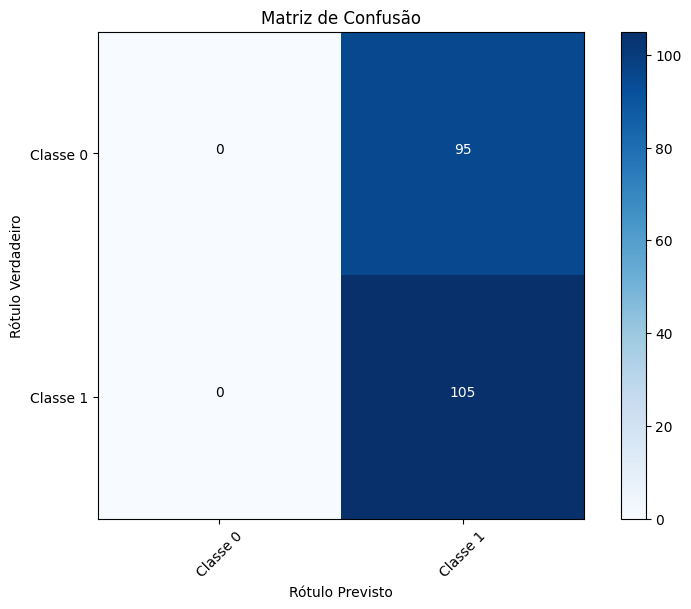

In [93]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import itertools  # Importe o módulo itertools

# Número de amostras de treinamento e teste
num_samples_train = 1000
num_samples_test = 200

# Tamanho das imagens
image_shape = (64, 64, 3)

# Gere dados de treinamento aleatórios
x_train = np.random.rand(num_samples_train, *image_shape)  # Gere imagens aleatórias
y_train = np.random.randint(0, 4, size=num_samples_train)  # Rótulos aleatórios (0 ou 1)

# Gere dados de teste aleatórios
x_test = np.random.rand(num_samples_test, *image_shape)  # Gere imagens aleatórias
y_test = np.random.randint(0, 2, size=num_samples_test)  # Rótulos aleatórios (0 ou 1)

# Definindo o número de classes (para classificação binária, é 1)
num_classes = 1

# Criando a arquitetura da rede neural
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=relu, input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=relu))
model.add(Dense(num_classes, activation=sigmoid))  # Usando sigmoid para classificação binária

# Compilando o modelo com o otimizador Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Usando binary_crossentropy para classificação binária
              metrics=['accuracy'])

# Definindo Early Stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Avaliando o modelo
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
confusion = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes, zero_division=1)


print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão:\n{confusion}')
print(f'Relatório de Classificação:\n{classification_rep}')




plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Classe 0', 'Classe 1'], rotation=45)
plt.yticks(tick_marks, ['Classe 0', 'Classe 1'])

thresh = confusion.max() / 2.
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, format(confusion[i, j], 'd'), horizontalalignment="center", color="white" if confusion[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.show()

Nesta sexta execução, a situação parece diferente em comparação com as execuções anteriores mudamos os rotulos aleatorios para (0,4):

- Loss e Acurácia durante o Treinamento:
A perda (loss) no conjunto de treinamento (train) está assumindo valores extremamente negativos, o que é uma situação incomum. A acurácia é em torno de 25.87%.
No conjunto de validação (validation), a perda também é negativa, e a acurácia é de aproximadamente 25%.
Matriz de Confusão:

- A matriz de confusão mostra que o modelo está classificando todos os exemplos como classe 1 (positivo), e nenhum exemplo é classificado como classe 0 (negativo).
Todos os exemplos são Verdadeiros Positivos (True Positives - TP) para a classe 1.Não há Verdadeiros Negativos (True Negatives - TN) para a classe 0, pois nenhum exemplo foi classificado como tal.
Todos os exemplos são Falsos Positivos (False Positives - FP) para a classe 1.
Relatório de Classificação:

- O relatório de classificação reflete a situação da matriz de confusão. A classe 0 tem uma precisão de 0.00, recall de 1.00 e F1-score de 0.00, indicando que não há previsões corretas para essa classe.
A classe 1 tem uma precisão de 1.00, recall de 0.53 e F1-score de 0.69, indicando que o modelo está classificando todos os exemplos como pertencentes a essa classe.

Os valores negativos da perda (loss) sugerem um problema na função de perda usada, o que é incomum. Os valores extremamente negativos indicam que algo pode estar errado com o treinamento do modelo.
A matriz de confusão indica que o modelo está tendo dificuldades em aprender a distinguir entre as classes e está classificando todos os exemplos como pertencentes à classe 1. Isso é uma anomalia.

### **Teste 7**

Epoch 1/20
250/250 [==============================] - 4s 8ms/step - loss: -7438215.0000 - accuracy: 0.2521 - val_loss: -41478536.0000 - val_accuracy: 0.2510
Epoch 2/20
250/250 [==============================] - 2s 6ms/step - loss: -320340256.0000 - accuracy: 0.2521 - val_loss: -872821504.0000 - val_accuracy: 0.2510
Epoch 3/20
250/250 [==============================] - 1s 6ms/step - loss: -2374521600.0000 - accuracy: 0.2521 - val_loss: -4601783808.0000 - val_accuracy: 0.2510
Epoch 4/20
250/250 [==============================] - 2s 7ms/step - loss: -8742440960.0000 - accuracy: 0.2521 - val_loss: -14180578304.0000 - val_accuracy: 0.2510
Epoch 5/20
250/250 [==============================] - 1s 6ms/step - loss: -22482700288.0000 - accuracy: 0.2521 - val_loss: -32811292672.0000 - val_accuracy: 0.2510
Epoch 6/20
250/250 [==============================] - 2s 7ms/step - loss: -46991773696.0000 - accuracy: 0.2521 - val_loss: -64369000448.0000 - val_accuracy: 0.2510
Epoch 7/20
250/250 [==========

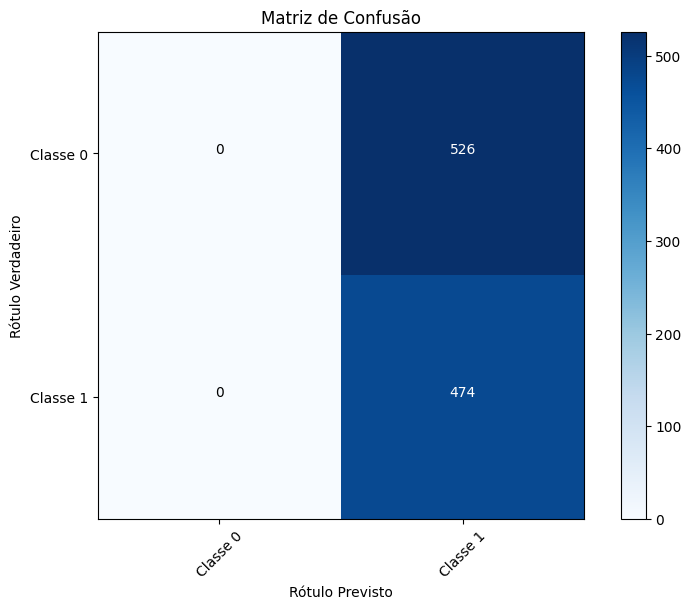

In [96]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import itertools  # Importe o módulo itertools

# Número de amostras de treinamento e teste
num_samples_train = 10000
num_samples_test = 1000

# Tamanho das imagens
image_shape = (64, 64, 3)

# Gere dados de treinamento aleatórios
x_train = np.random.rand(num_samples_train, *image_shape)  # Gere imagens aleatórias
y_train = np.random.randint(0, 4, size=num_samples_train)  # Rótulos aleatórios (0 ou 1)

# Gere dados de teste aleatórios
x_test = np.random.rand(num_samples_test, *image_shape)  # Gere imagens aleatórias
y_test = np.random.randint(0, 2, size=num_samples_test)  # Rótulos aleatórios (0 ou 1)

# Definindo o número de classes (para classificação binária, é 1)
num_classes = 1

# Criando a arquitetura da rede neural
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=relu, input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=relu))
model.add(Dense(num_classes, activation=sigmoid))  # Usando sigmoid para classificação binária

# Compilando o modelo com o otimizador Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Usando binary_crossentropy para classificação binária
              metrics=['accuracy'])

# Definindo Early Stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# Avaliando o modelo
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
confusion = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes, zero_division=1)


print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão:\n{confusion}')
print(f'Relatório de Classificação:\n{classification_rep}')




plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Classe 0', 'Classe 1'], rotation=45)
plt.yticks(tick_marks, ['Classe 0', 'Classe 1'])

thresh = confusion.max() / 2.
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, format(confusion[i, j], 'd'), horizontalalignment="center", color="white" if confusion[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.show()

Nessa sétima execuçao mudamos o x_train, o x_teste para 10000 e 1000. e os rotulos
aleatorios(0,4)

Nesta execução, os resultados são consistentes com as execuções anteriores e continuam indicando problemas graves no treinamento do modelo:

- Loss e Acurácia durante o Treinamento:
Assim como nas execuções anteriores, a perda no conjunto de treinamento assume valores negativos extremamente grandes. A acurácia é de aproximadamente 25.21%.
No conjunto de validação, a perda também é negativa, e a acurácia é de aproximadamente 25.10%.
Matriz de Confusão:

- A matriz de confusão mostra que o modelo está classificando todos os exemplos como classe 1 (positivo), e nenhum exemplo é classificado como classe 0 (negativo).
Todos os exemplos são Verdadeiros Positivos (True Positives - TP) para a classe 1.
Não há Verdadeiros Negativos  para a classe 0, pois nenhum exemplo foi classificado como tal.
Todos os exemplos são Falsos Positivos (False Positives - FP) para a classe 1.
Relatório de Classificação:
- O relatório de classificação reflete a situação da matriz de confusão. A classe 0 tem uma precisão de 0.00, recall de 1.00 e F1-score de 0.00, indicando que não há previsões corretas para essa classe.
A classe 1 tem uma precisão de 1.00, recall de 0.47 e F1-score de 0.64, indicando que o modelo está classificando todos os exemplos como pertencentes a essa classe.

Os resultados continuam a indicar problemas significativos no treinamento do modelo, e a situação não está melhorando.
Os valores extremamente negativos da perda sugerem que a função de perda ou o cálculo de gradiente estão com problemas.





